$$
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
\def\com#1{\color{blue}{\textrm{#1}}} 
$$
# Lab3: Dynamical Systems

- Two weeks. __Due:__ 1pm Wednesday 25th March.

- Submit your lab by dropping this notebook with your answers into `dropbox` on `pleiades`. 

- __Rename your notebook to__ `Lab3_yourLoginName.ipynb` before submitting it by dragging it onto the dropbox folder. You can confirm submission (and resubmit up to the deadline), by repreating the process. If you are asked whether to replace the file, this confirms it has been successfully submitted to the dropbox. __Please confirm your submission__.

$\com{Please leave this command for marker's comments}$

---

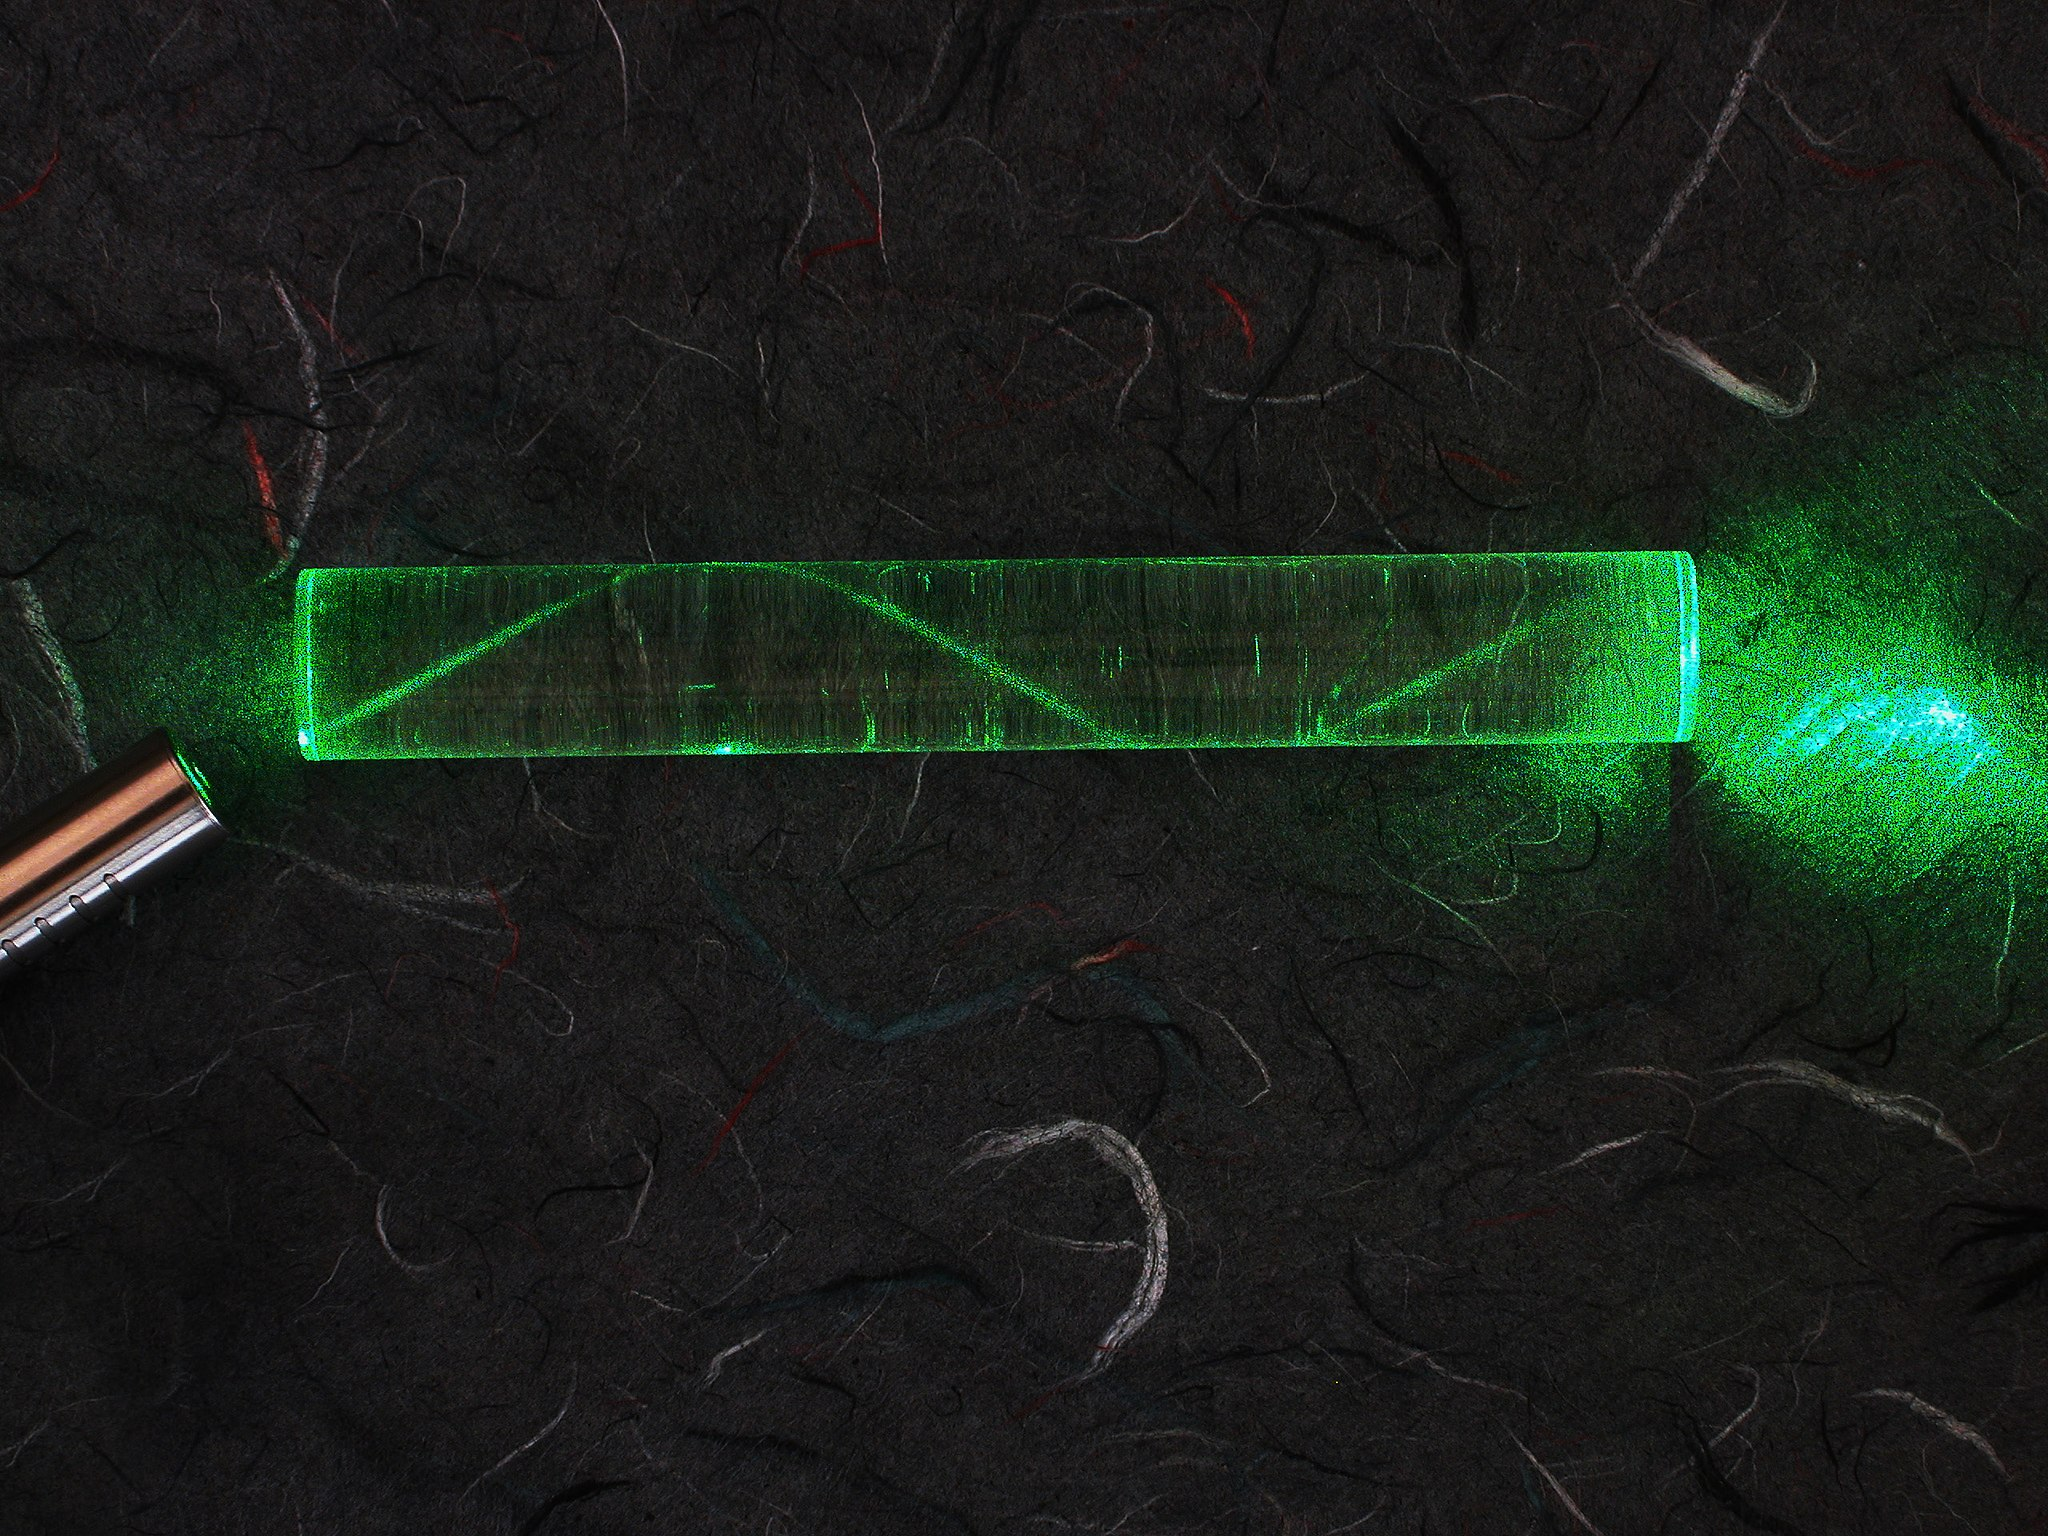

Timwether / CC BY-SA (https://creativecommons.org/licenses/by-sa/3.0)

# The laser
We start our study of dynamical systems using a simple model of the laser, one of the most important technologies of the modern era. 

We will consider a [solid-state laser](https://en.wikipedia.org/wiki/Solid-state_laser) which consists of an assembly of special (optically reactive at the right energy) atoms embedded in a solid state matrix. The matrix material is enclosed by a pair of opposing partially reflecting mirrors to create an optical cavity. 

An external energy source, referred to as the __pump__ provides photons used to excite the atoms out of their ground state. 

The laser exhibits a special property: as the pump power is increased, it reaches a **lasing threshold**, and above this critical pump strength, the laser emmits highly organized coherent light, resulting from the stimulated emission of photons into the same mode of the optical cavity.

## The model 
We will model the laser using a pair of rate equations. We have two variables describing the laser light building up in the system due to the pump:

- $N(t)$ is the number of atoms in the excited state.
- $n(t)$ is the number of photons in the laser cavity mode.

Our laser model consists of the pair of coupled ordinary differential equations

<div class="alert alert-block alert-warning">
<font color=blue>
$$\ale{
\frac{dn}{dt}&=\gamma nN-\kappa n\tag{Photons}\\
\frac{dN}{dt}&=-\gamma nN -\lambda N + p\tag{Excited atoms}
}$$
</font>
</div>

where 

- $\gamma$ is the gain rate for **stimulated emission** into the cavity. This is the coherent process that creates laser light.
- $\kappa$ is the decay rate due to loss of photons through the mirror, scattering, etc.
- $\lambda$ is the decay rate due to atoms **spontaneously emitting** a photon.
- $p$ is the pump rate constant. 

The populations are dimensionaless, and all other parameters are positive real numbers with dimensions $\textrm{s}^{-1}$. As simple as this model appears (just a modified Lotka-Volterra model), it is quite useful as a predictive model of the phenomenon of lasing.

# A. Steady states
1. Find the steady state solutions for the laser equations as a function of the pump rate $p$. Pay careful attention to regimes of validity for the solutions (e.g. are there any constraints on the number of atoms and number of photons?). Show that there is a threshold at $p_c=\lambda\kappa/\gamma$, where the steady state solutions for $\bar n$ and $\bar N$ change to allow $\bar n >0$. We will see in part B that this is the _lasing transition_. Write the steady state solution above threshold in terms of $p_c$. 
1. Using parameters $\gamma = 10^{-4}, \kappa = 0.01, \lambda = 0.03$, plot the stable steady state solution for $\bar n$ as a function of $p/p_c$ over the interval $0\leq p\leq 3p_c$. You will find it convenient later in the lab if you write separate julia functions for $\bar n(p)$ and $\bar N(p)$. Interpret your results.
1. With reference to the equations of motion, discuss the value of a dimensionless reformulation. Is the reformulation necessary for this problem? [Hint: what are the dimensions of $n$, and $N$?]

# Stability
How can we find out which of our solutions is valid in each regime? We need to study the linear stability of the two steady state solutions, above and below threshold. To linearize around a steady state, we write $n(t)\equiv\bar n+\delta n (t), N(t)\equiv\bar N+\delta N(t)$, and plug this into the equations of motion. Care should be taken to linearize around the appropriate steady-state solutions for each parameter regime.

<div class="alert alert-block alert-warning"><font color=blue>
    
__Definition:__ 
The steady state (fixed point) solution is considered ___stable___, provided perturbations cannot grow with time; at worst they can oscillate around the steady state solution. 

</font></div>
    
For first order systems of dynamical equations, stability of steady states can be classified using the [Jacobian](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant#Dynamical_systems) of the equations of motion, evaluated at the steady state solution. In what follows we will use a different approach for our system, by considering equations of motion for small fluctuations.

# B. Below threshold (Region I)
1. Linearise the equations of motion around the general steady state solution. Plug in the steady state solution below threshold and show that for $p<p_c$ the steady state is stable.
1. Using the values of $\gamma,\kappa,\lambda$ defined above, solve the equations of motion numerically from initial condition $n(0)=200,\; N(0)=400$, and verify that the system relaxes to the sub-threshold steady state you predicted when $p<p_c$ (i.e. if the system starts away from the steady state, it will move towards it: the steady state is an _attractor_). Use the julia package `OrdinaryDiffEq.jl` or `DifferentialEquations.jl` to do this, as described in **lecture 6**.

# C. Above threshold (region II)
1. Consider pumping just above threshold $p=1.1p_c$, and start from $N(0)=\bar N(p)$. Solve the equations of motion numerically, starting the photon population $n(0)$ **near** the sub-threshold steady state solution (i.e. at some small but non-zero photon number). Consider what happens when you change the initial condition to $n(0)=0$, and explain of your observations in terms of the steady state solutions found in part B.
1. Find the linearized equations of motion above threshold
1. Stability: Show that the equations of motion for $\delta n$ and $\delta N$ decouple into two independent equations of motion describing damped simple harmonic motion, and identify the damping rate and oscillation frequency. Rewrite the damping rate and oscillation frequency in terms of $p_c$. Interpret your result. [Hint: differentiate the equations of motion w.r.t time to get second order equations, and eliminate the unwanted variables using the first order equations; you should find the same damping and frequency appear in each equation].

1. Does this particular system (i.e. the parameters introduced in part A) ever reach an underdamped regime? 

\[**Hint:** Recall the standard procedure for analysing damped SHM: solve the equation of motion by assuming  $\delta n\propto e^{rt}$, substitute, and solve the characteristic equation for $r$ to locate the regimes of underdamped, critically damped, and overdamped operation.\]